<a href="https://colab.research.google.com/github/SahithiK792/ML/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

for filename in uploaded.keys():
  print(filename)

Saving iotsim-air-quality-1 (1).csv to iotsim-air-quality-1 (1).csv
iotsim-air-quality-1 (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("iotsim-air-quality-1 (1).csv")
print("Shape (rows, columns):", df.shape)
print("\nColumn info:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumeric summary:")
print(df.describe())


Shape (rows, columns): (55052, 23)

Column info:
frame.time                      object
frame.len                        int64
frame.protocols                 object
eth.src                         object
eth.dst                         object
ip.dst                          object
ip.src                          object
ip.flags                        object
ip.ttl                           int64
ip.proto                         int64
ip.checksum                     object
ip.tos                         float64
tcp.srcport                    float64
tcp.dstport                    float64
tcp.flags                       object
tcp.window_size_value          float64
tcp.window_size_scalefactor    float64
tcp.checksum                    object
tcp.options                     object
tcp.pdu.size                   float64
udp.srcport                    float64
udp.dstport                    float64
label                           object
dtype: object

Missing values per column:
frame.time  

In [ ]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill numeric columns with their mean
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with their most frequent value (mode)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify
print("Remaining missing values:")
print(df.isnull().sum())


Remaining missing values:
frame.time                         0
frame.len                          0
frame.protocols                    0
eth.src                            0
eth.dst                            0
ip.dst                             0
ip.src                             0
ip.flags                           0
ip.ttl                             0
ip.proto                           0
ip.checksum                        0
ip.tos                         55052
tcp.srcport                        0
tcp.dstport                        0
tcp.flags                          0
tcp.window_size_value              0
tcp.window_size_scalefactor        0
tcp.checksum                       0
tcp.options                        0
tcp.pdu.size                       0
udp.srcport                        0
udp.dstport                        0
label                              0
dtype: int64


Question 1

In [ ]:


import math
import numpy as np
from typing import List, Sequence, Tuple, Union, Dict

# -------- Summation unit --------
def summation_unit(weights: Sequence[float], inputs: Sequence[float]) -> float:
    """
    Compute the weighted sum (net input).
    weights: sequence where weights[0] is bias weight (w0).
    inputs: sequence of input features (length must be len(weights)-1).
    Returns: scalar net = w0*1 + sum_{i} w_i * x_i
    """
    if len(weights) != len(inputs) + 1:
        raise ValueError("weights length must be inputs length + 1 (bias included as weights[0])")
    net = weights[0]  # bias * 1
    for w, x in zip(weights[1:], inputs):
        net += w * x
    return net


# -------- Activation unit (multiple functions) --------
def activation_unit(net: float, kind: str = "step", params: Dict = None) -> float:

    if params is None:
        params = {}

    kind = kind.lower()
    if kind == "step":
        # standard binary step: output 1 if net >= 0 else 0
        return 1.0 if net >= 0.0 else 0.0

    elif kind == "bipolar_step":
        # bipolar step: output +1 if net >= 0 else -1
        return 1.0 if net >= 0.0 else -1.0

    elif kind == "sigmoid":
        # logistic sigmoid: 1 / (1 + exp(-beta * net))
        beta = float(params.get("beta", 1.0))
        # numerical stability
        if net >= 0:
            z = math.exp(-beta * net)
            return 1.0 / (1.0 + z)
        else:
            z = math.exp(beta * net)
            return z / (1.0 + z)

    elif kind == "tanh":
        # hyperbolic tangent
        return math.tanh(net)

    elif kind == "relu":
        # rectified linear unit
        return net if net > 0.0 else 0.0

    elif kind == "leaky_relu":
        # leaky ReLU: alpha * net for net < 0
        alpha = float(params.get("alpha", 0.01))
        return net if net > 0.0 else alpha * net

    else:
        raise ValueError(f"Unsupported activation kind: {kind}")


# -------- Comparator unit for error calculation --------
def comparator_unit(targets: Sequence[float],
                    outputs: Sequence[float],
                    kind: str = "sse") -> float:
    """
    Compute error between targets and outputs.
    targets: sequence of target values (floats)
    outputs: sequence of predicted values (floats)
    kind: 'sse' for sum-squared-error, 'mse' for mean-squared-error
    Returns: error scalar
    """
    if len(targets) != len(outputs):
        raise ValueError("targets and outputs must have same length")
    diffs = [(t - o) for t, o in zip(targets, outputs)]
    sq = [d * d for d in diffs]
    sse = sum(sq)
    if kind.lower() == "sse":
        return sse
    elif kind.lower() == "mse":
        return sse / len(targets) if len(targets) > 0 else 0.0
    else:
        raise ValueError(f"Unsupported error kind: {kind}")


# -------- Small demo (prints only in main) --------
if __name__ == "__main__":
    # demo inputs for AND gate
    X = [(0,0), (0,1), (1,0), (1,1)]
    y = [0, 0, 0, 1]  # AND outputs

    # example weights: bias + two weights
    w = [ -0.5, 0.7, 0.7 ]  # (w0, w1, w2) - arbitrary example

    outputs = []
    for inp in X:
        net = summation_unit(w, inp)
        out = activation_unit(net, kind="step")
        outputs.append(out)

    print("Inputs:", X)
    print("Targets:", y)
    print("Outputs (step activation):", outputs)
    print("SSE:", comparator_unit(y, outputs, kind="sse"))
    print("MSE:", comparator_unit(y, outputs, kind="mse"))


Inputs: [(0, 0), (0, 1), (1, 0), (1, 1)]
Targets: [0, 0, 0, 1]
Outputs (step activation): [0.0, 1.0, 1.0, 1.0]
SSE: 2.0
MSE: 0.5


Question 2

Epoch   50  SSE = 4.000000
Epoch  100  SSE = 4.000000
Epoch  129  SSE = 0.000000

Training finished.
Converged: True
Epochs run: 129
Final weights (bias, w1, w2): [-0.1   0.1   0.05]
Final SSE: 0.0


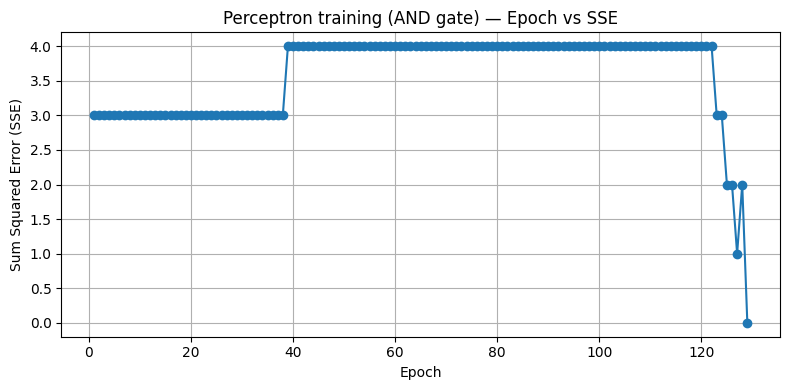

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_activation(net: float) -> int:
    return 1 if net >= 0.0 else 0

def perceptron_train_and(X: np.ndarray,
                         y: np.ndarray,
                         w_init: np.ndarray,
                         alpha: float = 0.05,
                         max_epochs: int = 1000,
                         converge_sse: float = 0.002):

    # Ensure numpy arrays
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)
    w = w_init.astype(float).copy()  # bias at w[0]
    n_samples, n_features = X.shape
    if len(w) != n_features + 1:
        raise ValueError("w_init length must be n_features + 1 (bias included as w[0])")

    errors = []  # SSE per epoch
    for epoch in range(1, max_epochs + 1):
        # For perceptron we typically loop through samples and update weights online
        for xi, target in zip(X, y):
            net = w[0] + np.dot(w[1:], xi)  # bias + sum(w_i * x_i)
            out = step_activation(net)
            err = target - out
            # weight updates (bias and other weights)
            w[0] += alpha * err * 1.0
            w[1:] += alpha * err * xi

        # After completing the epoch, compute outputs and SSE across all samples
        nets = w[0] + X.dot(w[1:])
        outputs = np.where(nets >= 0.0, 1.0, 0.0)
        sse = np.sum((y - outputs) ** 2)
        errors.append(sse)

        # Print progress every 50 epochs (optional; allowed in main)
        if epoch % 50 == 0 or sse <= converge_sse:
            print(f"Epoch {epoch:4d}  SSE = {sse:.6f}")

        # Check convergence
        if sse <= converge_sse:
            return {"weights": w, "errors": errors, "epochs": epoch, "converged": True}

    # If reached here, not converged within max_epochs
    return {"weights": w, "errors": errors, "epochs": max_epochs, "converged": False}


if __name__ == "__main__":
    # AND gate dataset
    # X rows: [A, B]
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ], dtype=float)
    y = np.array([0, 0, 0, 1], dtype=float)

    # Initial weights from lab (bias, w1, w2)
    w_init = np.array([10.0, 0.2, -0.75], dtype=float)

    alpha = 0.05
    result = perceptron_train_and(X, y, w_init=w_init, alpha=alpha,
                                  max_epochs=1000, converge_sse=0.002)

    final_w = result["weights"]
    epochs_run = result["epochs"]
    converged = result["converged"]
    errors = result["errors"]

    print("\nTraining finished.")
    print("Converged:" , converged)
    print("Epochs run:", epochs_run)
    print("Final weights (bias, w1, w2):", final_w)
    print("Final SSE:", errors[-1] if errors else None)

    # Plot epochs vs SSE
    plt.figure(figsize=(8,4))
    plt.plot(range(1, len(errors)+1), errors, marker='o')
    plt.title("Perceptron training (AND gate) — Epoch vs SSE")
    plt.xlabel("Epoch")
    plt.ylabel("Sum Squared Error (SSE)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Qusetion 3

[step] Epoch 100  SSE=4.000000
[step] Epoch 129  SSE=0.000000
=== step finished: converged=True epochs=129 final_SSE=0.000000
[bipolar_step] Epoch 67  SSE=0.000000
=== bipolar_step finished: converged=True epochs=67 final_SSE=0.000000
[sigmoid] Epoch 100  SSE=2.999642
[sigmoid] Epoch 200  SSE=2.999642
[sigmoid] Epoch 300  SSE=2.999641
[sigmoid] Epoch 400  SSE=2.999641
[sigmoid] Epoch 500  SSE=2.999641
[sigmoid] Epoch 600  SSE=2.999640
[sigmoid] Epoch 700  SSE=2.999640
[sigmoid] Epoch 800  SSE=2.999639
[sigmoid] Epoch 900  SSE=2.999639
[sigmoid] Epoch 1000  SSE=2.999638
=== sigmoid finished: converged=False epochs=1000 final_SSE=2.999638
[tanh] Epoch 100  SSE=12.000000
[tanh] Epoch 200  SSE=12.000000
[tanh] Epoch 300  SSE=12.000000
[tanh] Epoch 400  SSE=12.000000
[tanh] Epoch 500  SSE=12.000000
[tanh] Epoch 600  SSE=12.000000
[tanh] Epoch 700  SSE=12.000000
[tanh] Epoch 800  SSE=12.000000
[tanh] Epoch 900  SSE=12.000000
[tanh] Epoch 1000  SSE=12.000000
=== tanh finished: converged=False

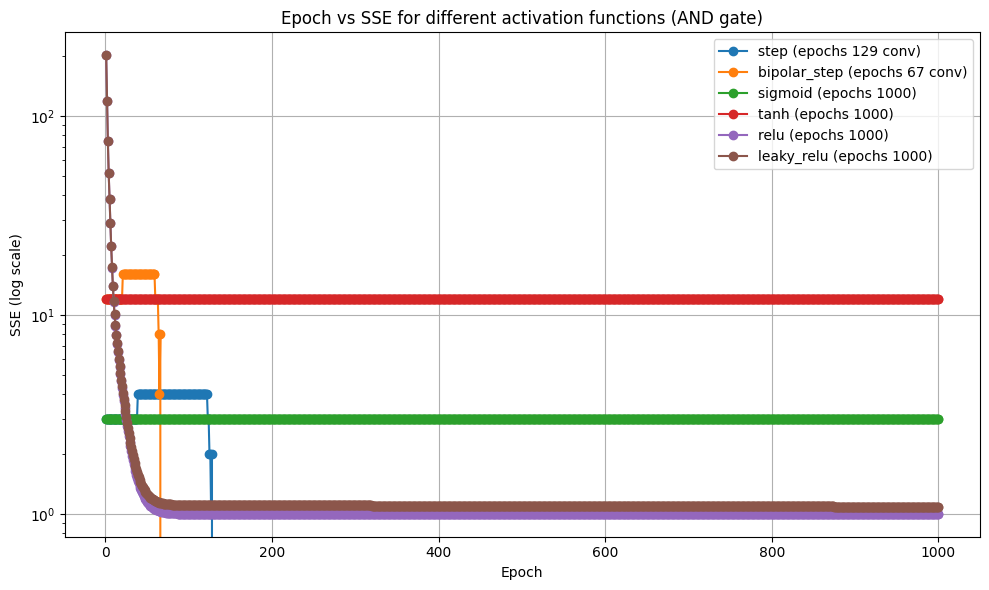


Summary:
 step         | converged:     1 | epochs:  129 | final SSE: 0.000000
 bipolar_step | converged:     1 | epochs:   67 | final SSE: 0.000000
 sigmoid      | converged:     0 | epochs: 1000 | final SSE: 2.999638
 tanh         | converged:     0 | epochs: 1000 | final SSE: 12.000000
 relu         | converged:     0 | epochs: 1000 | final SSE: 1.000000
 leaky_relu   | converged:     0 | epochs: 1000 | final SSE: 1.085276


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Dict

# --- Dataset (AND) ---
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y_binary = np.array([0.,0.,0.,1.])   # for sigmoid / ReLU style outputs
y_bipolar = np.array([-1.,-1.,-1.,1.])  # for bipolar/tanh outputs

# --- Helper activation functions and derivatives ---
def step_act(net: float) -> float:
    return 1.0 if net >= 0.0 else 0.0

def bipolar_step_act(net: float) -> float:
    return 1.0 if net >= 0.0 else -1.0

def sigmoid_act(net: float, beta: float = 1.0) -> float:
    # numerically stable sigmoid
    if net >= 0:
        z = np.exp(-beta * net)
        return 1.0 / (1.0 + z)
    else:
        z = np.exp(beta * net)
        return z / (1.0 + z)

def sigmoid_derivative(out: float, beta: float = 1.0) -> float:
    # derivative with respect to net: beta * out * (1 - out)
    return beta * out * (1.0 - out)

def tanh_act(net: float) -> float:
    return np.tanh(net)

def tanh_derivative(out: float) -> float:
    # derivative of tanh wrt net = 1 - out^2 (where out = tanh(net))
    return 1.0 - out * out

def relu_act(net: float) -> float:
    return net if net > 0.0 else 0.0

def relu_derivative(net: float) -> float:
    return 1.0 if net > 0.0 else 0.0

def leaky_relu_act(net: float, alpha: float = 0.01) -> float:
    return net if net > 0.0 else alpha * net

def leaky_relu_derivative(net: float, alpha: float = 0.01) -> float:
    return 1.0 if net > 0.0 else alpha

# --- Training routine (handles both perceptron and delta-rule types) ---
def train_single_neuron(X: np.ndarray,
                        y: np.ndarray,
                        w_init: np.ndarray,
                        activation: str,
                        alpha: float = 0.05,
                        max_epochs: int = 1000,
                        converge_sse: float = 0.002,
                        params: Dict = None) -> Dict:

    if params is None:
        params = {}
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)
    w = w_init.astype(float).copy()  # bias at w[0]
    n_samples, n_features = X.shape
    if len(w) != n_features + 1:
        raise ValueError("w_init length must be n_features + 1 (bias included as w[0])")

    errors = []
    activation = activation.lower()

    for epoch in range(1, max_epochs + 1):
        # online updates (shuffle order optionally — not necessary for tiny AND dataset)
        for xi, target in zip(X, y):
            net = w[0] + np.dot(w[1:], xi)

            # Perceptron updates for (step, bipolar_step)
            if activation == "step":
                out = step_act(net)
                err = target - out
                # perceptron update
                w[0] += alpha * err * 1.0
                w[1:] += alpha * err * xi

            elif activation == "bipolar_step":
                out = bipolar_step_act(net)
                err = target - out
                # perceptron update but targets/outputs are -1/+1
                w[0] += alpha * err * 1.0
                w[1:] += alpha * err * xi

            # Delta-rule updates for differentiable activations
            elif activation == "sigmoid":
                beta = params.get("beta", 1.0)
                out = sigmoid_act(net, beta=beta)
                err = target - out
                deriv = sigmoid_derivative(out, beta=beta)
                # gradient descent update for MSE: w += alpha * err * deriv * input
                w[0] += alpha * err * deriv * 1.0
                w[1:] += alpha * err * deriv * xi

            elif activation == "tanh":
                out = tanh_act(net)
                err = target - out
                deriv = tanh_derivative(out)
                w[0] += alpha * err * deriv * 1.0
                w[1:] += alpha * err * deriv * xi

            elif activation == "relu":
                out = relu_act(net)
                err = target - out
                deriv = relu_derivative(net)
                w[0] += alpha * err * deriv * 1.0
                w[1:] += alpha * err * deriv * xi

            elif activation == "leaky_relu":
                leak_alpha = params.get("leak_alpha", 0.01)
                out = leaky_relu_act(net, alpha=leak_alpha)
                err = target - out
                deriv = leaky_relu_derivative(net, alpha=leak_alpha)
                w[0] += alpha * err * deriv * 1.0
                w[1:] += alpha * err * deriv * xi

            else:
                raise ValueError("Unsupported activation for training: " + activation)

        # After epoch: compute SSE across all samples in the output space appropriate for the activation
        nets = w[0] + X.dot(w[1:])
        if activation == "step":
            outputs = np.where(nets >= 0.0, 1.0, 0.0)
            sse = np.sum((y - outputs) ** 2)

        elif activation == "bipolar_step":
            outputs = np.where(nets >= 0.0, 1.0, -1.0)
            sse = np.sum((y - outputs) ** 2)

        elif activation == "sigmoid":
            beta = params.get("beta", 1.0)
            vec_sig = np.vectorize(lambda v: sigmoid_act(v, beta=beta))
            outputs = vec_sig(nets)
            sse = np.sum((y - outputs) ** 2)

        elif activation == "tanh":
            outputs = np.tanh(nets)
            sse = np.sum((y - outputs) ** 2)

        elif activation == "relu":
            outputs = np.where(nets > 0.0, nets, 0.0)
            sse = np.sum((y - outputs) ** 2)

        elif activation == "leaky_relu":
            leak_alpha = params.get("leak_alpha", 0.01)
            outputs = np.where(nets > 0.0, nets, leak_alpha * nets)
            sse = np.sum((y - outputs) ** 2)

        else:
            sse = np.sum((y - nets) ** 2)  # fallback

        errors.append(sse)

        # Optional progress print
        if epoch % 100 == 0 or sse <= converge_sse:
            print(f"[{activation}] Epoch {epoch}  SSE={sse:.6f}")

        if sse <= converge_sse:
            return {"weights": w, "errors": errors, "epochs": epoch, "converged": True}

    return {"weights": w, "errors": errors, "epochs": max_epochs, "converged": False}


# --- Run experiments for each activation ---
w_init = np.array([10.0, 0.2, -0.75], dtype=float)  # same initial weights as A2
max_epochs = 1000
alpha = 0.05
converge_sse = 0.002

experiments = [
    {"name": "step", "targets": y_binary, "params": {}},
    {"name": "bipolar_step", "targets": y_bipolar, "params": {}},
    {"name": "sigmoid", "targets": y_binary, "params": {"beta": 1.0}},
    {"name": "tanh", "targets": y_bipolar, "params": {}},
    {"name": "relu", "targets": y_binary, "params": {}},
    {"name": "leaky_relu", "targets": y_binary, "params": {"leak_alpha": 0.01}},
]

results = {}
for exp in experiments:
    # use a fresh copy of initial weights for each run
    res = train_single_neuron(X, exp["targets"], w_init=w_init.copy(),
                              activation=exp["name"],
                              alpha=alpha,
                              max_epochs=max_epochs,
                              converge_sse=converge_sse,
                              params=exp["params"])
    results[exp["name"]] = res
    print(f"=== {exp['name']} finished: converged={res['converged']} epochs={res['epochs']} final_SSE={res['errors'][-1]:.6f}")

# --- Plot SSE curves for all activations on one plot ---
plt.figure(figsize=(10,6))
for name, res in results.items():
    plt.plot(range(1, len(res["errors"])+1), res["errors"], marker='o', label=f"{name} (epochs {res['epochs']}{' conv' if res['converged'] else ''})")
plt.yscale('log')   # use log scale for readability when SSE values vary a lot
plt.xlabel("Epoch")
plt.ylabel("SSE (log scale)")
plt.title("Epoch vs SSE for different activation functions (AND gate)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Summary printout ---
print("\nSummary:")
for name, res in results.items():
    print(f" {name:12s} | converged: {res['converged']:5} | epochs: {res['epochs']:4} | final SSE: {res['errors'][-1]:.6f}")


Question 4

alpha=0.1 | converged=True | epochs=67 | final SSE=0.000000
alpha=0.2 | converged=True | epochs=36 | final SSE=0.000000
alpha=0.3 | converged=True | epochs=22 | final SSE=0.000000
alpha=0.4 | converged=True | epochs=22 | final SSE=0.000000
alpha=0.5 | converged=True | epochs=18 | final SSE=0.000000
alpha=0.6 | converged=True | epochs=18 | final SSE=0.000000
alpha=0.7 | converged=True | epochs=14 | final SSE=0.000000
alpha=0.8 | converged=True | epochs=13 | final SSE=0.000000
alpha=0.9 | converged=True | epochs=12 | final SSE=0.000000
alpha=1.0 | converged=True | epochs=11 | final SSE=0.000000


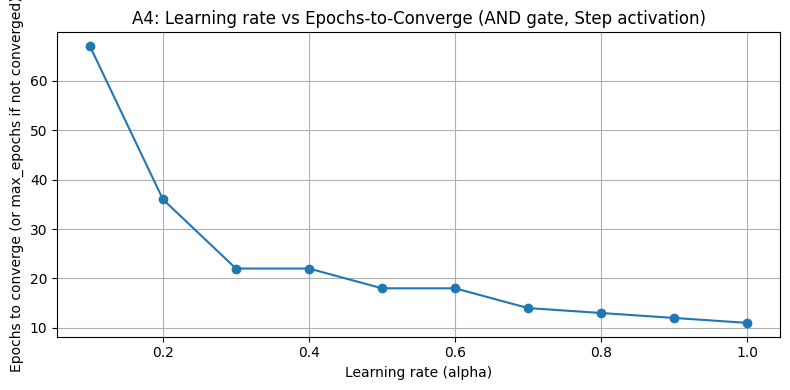


Summary table:
alpha    converged    epochs   final_SSE   
0.1      True         67       0.000000    
0.2      True         36       0.000000    
0.3      True         22       0.000000    
0.4      True         22       0.000000    
0.5      True         18       0.000000    
0.6      True         18       0.000000    
0.7      True         14       0.000000    
0.8      True         13       0.000000    
0.9      True         12       0.000000    
1.0      True         11       0.000000    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Perceptron training function  ---
def perceptron_train_and(X: np.ndarray,
                         y: np.ndarray,
                         w_init: np.ndarray,
                         alpha: float = 0.05,
                         max_epochs: int = 1000,
                         converge_sse: float = 0.002):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)
    w = w_init.astype(float).copy()
    n_samples, n_features = X.shape
    if len(w) != n_features + 1:
        raise ValueError("w_init length must be n_features + 1 (bias included as w[0])")

    errors = []
    for epoch in range(1, max_epochs + 1):
        for xi, target in zip(X, y):
            net = w[0] + np.dot(w[1:], xi)
            out = 1 if net >= 0.0 else 0
            err = target - out
            w[0] += alpha * err * 1.0
            w[1:] += alpha * err * xi

        nets = w[0] + X.dot(w[1:])
        outputs = np.where(nets >= 0.0, 1.0, 0.0)
        sse = np.sum((y - outputs) ** 2)
        errors.append(sse)

        if sse <= converge_sse:
            return {"weights": w, "errors": errors, "epochs": epoch, "converged": True}
    return {"weights": w, "errors": errors, "epochs": max_epochs, "converged": False}


# --- Dataset (AND) ---
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([0.,0.,0.,1.])

# Initial weights (lab-specified)
w_init = np.array([10.0, 0.2, -0.75], dtype=float)

# Learning rates to test
alphas = [round(x,1) for x in np.linspace(0.1, 1.0, 10)]
max_epochs = 1000
converge_sse = 0.002

results = []
for a in alphas:
    res = perceptron_train_and(X, y, w_init=w_init.copy(),
                              alpha=a,
                              max_epochs=max_epochs,
                              converge_sse=converge_sse)
    epochs_taken = res["epochs"] if res["converged"] else max_epochs
    results.append({"alpha": a, "epochs": epochs_taken, "converged": res["converged"], "final_sse": res["errors"][-1]})
    print(f"alpha={a:.1f} | converged={res['converged']} | epochs={epochs_taken} | final SSE={res['errors'][-1]:.6f}")

# Prepare plot data
alphas_plot = [r["alpha"] for r in results]
epochs_plot = [r["epochs"] for r in results]

# Plot learning rate vs iterations-to-converge
plt.figure(figsize=(8,4))
plt.plot(alphas_plot, epochs_plot, marker='o', linestyle='-')
plt.xlabel("Learning rate (alpha)")
plt.ylabel("Epochs to converge (or max_epochs if not converged)")
plt.title("A4: Learning rate vs Epochs-to-Converge (AND gate, Step activation)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary table:")
print("{:<8s} {:<12s} {:<8s} {:<12s}".format("alpha","converged","epochs","final_SSE"))
for r in results:
    print("{:<8.1f} {:<12} {:<8d} {:<12.6f}".format(r["alpha"], str(r["converged"]), r["epochs"], r["final_sse"]))


Question 5

Step converged in 1000 epochs, final weights: [ 0.04532725 -0.07471597 -0.00965181]
Bipolar Step converged in 1000 epochs, final weights: [ 0.08025852 -0.07822134  0.00917959]
Sigmoid converged in 1000 epochs, final weights: [ 0.02529666 -0.05061672 -0.02529975]
ReLU converged in 1000 epochs, final weights: [ 0.52631579 -0.05263158 -0.02631579]


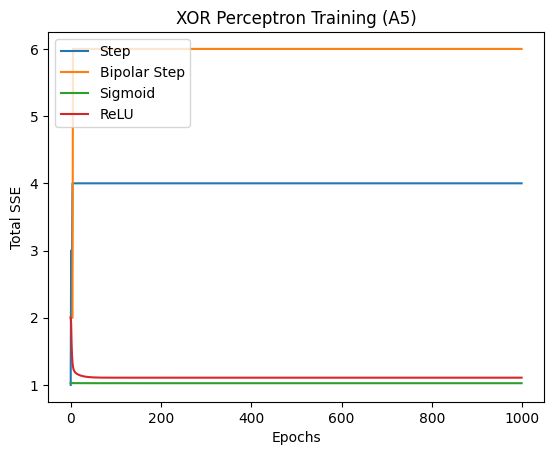

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Activation Functions

def step(x):
    return np.where(x >= 0, 1, 0)

def bipolar_step(x):
    return np.where(x >= 0, 1, -1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Perceptron Training Function

def train_perceptron(X, y, activation, lr=0.05, max_epochs=1000, tol=0.002):

    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    weights = np.random.randn(X_bias.shape[1]) * 0.1  # small random init
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X_bias, y):
            net = np.dot(xi, weights)
            out = activation(net)
            # Ensure binary output (for step/bipolar-step)
            if activation == step:
                out = 1 if net >= 0 else 0
            elif activation == bipolar_step:
                out = 1 if net >= 0 else -1
            # Error
            err = target - out
            total_error += err**2
            # Weight update
            weights += lr * err * xi
        errors.append(total_error)
        if total_error <= tol:
            break
    return weights, errors

# Main Section: XOR Gate

if __name__ == "__main__":
    # XOR truth table
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0,1,1,0])  # target

    activations = {
        "Step": step,
        "Bipolar Step": bipolar_step,
        "Sigmoid": sigmoid,
        "ReLU": relu
    }

    for name, act in activations.items():
        w, errs = train_perceptron(X, y, act)
        print(f"{name} converged in {len(errs)} epochs, final weights: {w}")
        plt.plot(errs, label=name)

    plt.xlabel("Epochs")
    plt.ylabel("Total SSE")
    plt.title("XOR Perceptron Training (A5)")
    plt.legend()
    plt.show()


Question 6

Final Weights: [1.27731595 0.00671062 2.91266141 0.18770484 3.13789092]
Epochs to converge: 1000


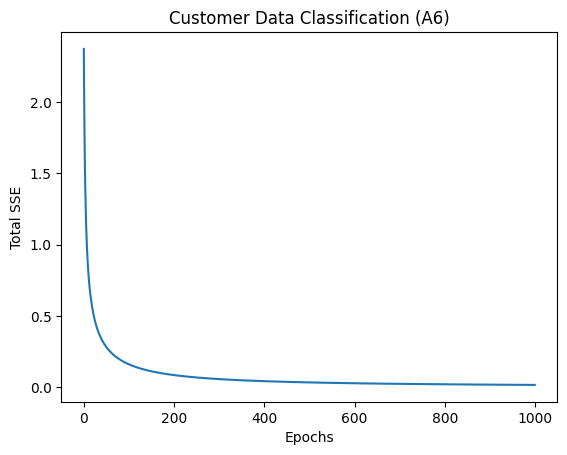

Predictions: [1 1 1 0 1 0 1 1 0 0]
True labels: [1 1 1 0 1 0 1 1 0 0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation & Derivative

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Perceptron Training (Sigmoid)

def train_sigmoid_perceptron(X, y, lr=0.05, max_epochs=1000, tol=0.002):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias column
    weights = np.random.randn(X_bias.shape[1]) * 0.1
    errors = []

    for epoch in range(max_epochs):
        total_error = 0
        for xi, target in zip(X_bias, y):
            net = np.dot(xi, weights)
            out = sigmoid(net)
            err = target - out
            total_error += err**2
            # Gradient descent update
            weights += lr * err * sigmoid_derivative(net) * xi
        errors.append(total_error)
        if total_error <= tol:
            break
    return weights, errors

# Main Section: Customer Dataset

if __name__ == "__main__":
    # Input features: [Candies, Mangoes, Milk Packets, Payment]
    X = np.array([
        [20,6,2,386],
        [16,3,6,289],
        [27,6,2,393],
        [19,1,2,110],
        [24,4,2,280],
        [22,1,5,167],
        [15,4,2,271],
        [18,4,2,274],
        [21,1,4,148],
        [16,2,4,198]
    ], dtype=float)

    # Targets: Yes=1, No=0
    y = np.array([1,1,1,0,1,0,1,1,0,0], dtype=float)

    # Normalize features for better training
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    weights, errs = train_sigmoid_perceptron(X, y, lr=0.1)

    print("Final Weights:", weights)
    print("Epochs to converge:", len(errs))

    # Plot error curve
    plt.plot(errs)
    plt.xlabel("Epochs")
    plt.ylabel("Total SSE")
    plt.title("Customer Data Classification (A6)")
    plt.show()

    # Predictions
    preds = sigmoid(np.dot(np.c_[np.ones((X.shape[0],1)), X], weights))
    preds_class = (preds >= 0.5).astype(int)
    print("Predictions:", preds_class)
    print("True labels:", y.astype(int))


Question 7

In [ ]:
import numpy as np

# Pseudo-Inverse Solution

def pseudo_inverse_solution(X, y):
    # Add bias column
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    # Compute weights using Moore–Penrose pseudo-inverse
    w = np.linalg.pinv(X_bias) @ y
    return w

# Main Section: Compare Perceptron vs Pseudo-Inverse

if __name__ == "__main__":
    # Customer dataset
    X = np.array([
        [20,6,2,386],
        [16,3,6,289],
        [27,6,2,393],
        [19,1,2,110],
        [24,4,2,280],
        [22,1,5,167],
        [15,4,2,271],
        [18,4,2,274],
        [21,1,4,148],
        [16,2,4,198]
    ], dtype=float)

    y = np.array([1,1,1,0,1,0,1,1,0,0], dtype=float)

    # Normalize features
    X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

    # --- Perceptron ---
    from math import exp

    def sigmoid(x): return 1 / (1 + np.exp(-x))
    def sigmoid_derivative(x): return sigmoid(x) * (1 - sigmoid(x))

    def train_sigmoid_perceptron(X, y, lr=0.1, max_epochs=1000, tol=0.002):
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        weights = np.random.randn(X_bias.shape[1]) * 0.1
        for epoch in range(max_epochs):
            total_error = 0
            for xi, target in zip(X_bias, y):
                net = np.dot(xi, weights)
                out = sigmoid(net)
                err = target - out
                total_error += err**2
                weights += lr * err * sigmoid_derivative(net) * xi
            if total_error <= tol:
                break
        return weights

    perceptron_weights = train_sigmoid_perceptron(X_norm, y)

    # --- Pseudo-Inverse ---
    pinv_weights = pseudo_inverse_solution(X_norm, y)

    # Predictions
    preds_perceptron = sigmoid(np.dot(np.c_[np.ones((X_norm.shape[0],1)), X_norm], perceptron_weights))
    preds_pinv = sigmoid(np.dot(np.c_[np.ones((X_norm.shape[0],1)), X_norm], pinv_weights))

    # Convert to binary classes
    preds_perceptron_class = (preds_perceptron >= 0.5).astype(int)
    preds_pinv_class = (preds_pinv >= 0.5).astype(int)

    print("Perceptron Weights (A6):", perceptron_weights)
    print("Pseudo-Inverse Weights (A7):", pinv_weights)

    print("\nPerceptron Predictions:", preds_perceptron_class)
    print("Pseudo-Inverse Predictions:", preds_pinv_class)
    print("True Labels:", y.astype(int))


Perceptron Weights (A6): [ 1.27311956e+00 -1.29098329e-03  2.82541750e+00  1.64212159e-01
  3.21754133e+00]
Pseudo-Inverse Weights (A7): [ 0.6        -0.09436819  0.21713405 -0.01342766  0.23416864]

Perceptron Predictions: [1 1 1 0 1 0 1 1 0 0]
Pseudo-Inverse Predictions: [1 1 1 1 1 1 1 1 1 1]
True Labels: [1 1 1 0 1 0 1 1 0 0]


Question 8

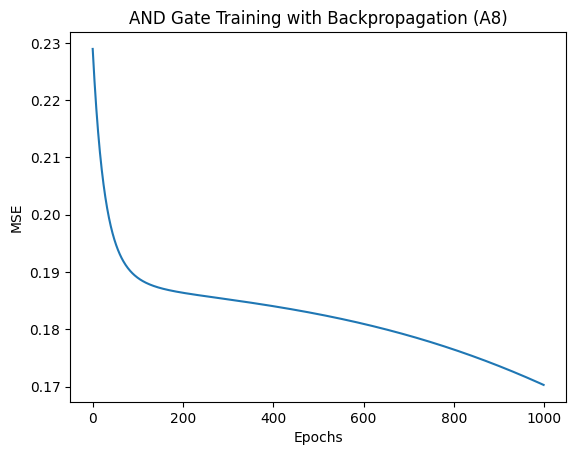

Final Predictions: [[0.219]
 [0.253]
 [0.259]
 [0.292]]
True Labels: [0 0 0 1]
Epochs to converge: 1000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Sigmoid Activation

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


# Backpropagation Neural Network

class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.05):
        # Initialize weights with small random values
        self.W1 = np.random.randn(input_size + 1, hidden_size) * 0.1  # +1 for bias
        self.W2 = np.random.randn(hidden_size + 1, output_size) * 0.1
        self.lr = lr

    def forward(self, X):
        # Add bias to input
        self.Xb = np.c_[np.ones((X.shape[0], 1)), X]
        self.Z1 = sigmoid(np.dot(self.Xb, self.W1))
        # Add bias to hidden layer
        self.Z1b = np.c_[np.ones((self.Z1.shape[0], 1)), self.Z1]
        self.output = sigmoid(np.dot(self.Z1b, self.W2))
        return self.output

    def backward(self, y):
        # Output error
        error = y - self.output
        d_output = error * sigmoid_derivative(np.dot(self.Z1b, self.W2))

        # Hidden error
        d_hidden = d_output.dot(self.W2[1:].T) * sigmoid_derivative(np.dot(self.Xb, self.W1))

        # Update weights
        self.W2 += self.lr * self.Z1b.T.dot(d_output)
        self.W1 += self.lr * self.Xb.T.dot(d_hidden)

        return np.mean(error**2)  # return MSE

    def train(self, X, y, max_epochs=1000, tol=0.002):
        errors = []
        for epoch in range(max_epochs):
            self.forward(X)
            mse = self.backward(y)
            errors.append(mse)
            if mse <= tol:
                break
        return errors


# Main Section: AND Gate

if __name__ == "__main__":
    # AND gate inputs and outputs
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[0],[0],[1]])  # column vector

    # Train NN
    nn = SimpleNN(input_size=2, hidden_size=2, output_size=1, lr=0.05)
    errors = nn.train(X, y)

    # Plot error convergence
    plt.plot(errors)
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title("AND Gate Training with Backpropagation (A8)")
    plt.show()

    # Final predictions
    preds = nn.forward(X)
    print("Final Predictions:", np.round(preds,3))
    print("True Labels:", y.ravel())
    print("Epochs to converge:", len(errors))


Question 9

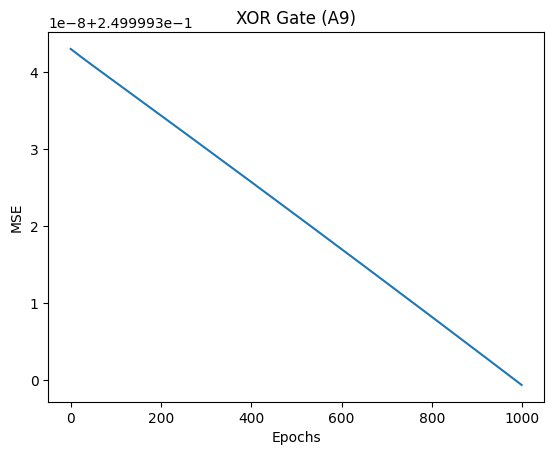

Predictions: [0.5   0.499 0.501 0.5  ]
True Labels: [0 1 1 0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid & derivative
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return sigmoid(x) * (1 - sigmoid(x))

# Simple 2-layer NN
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.05):
        self.W1 = np.random.randn(input_size + 1, hidden_size) * 0.1
        self.W2 = np.random.randn(hidden_size + 1, output_size) * 0.1
        self.lr = lr

    def forward(self, X):
        self.Xb = np.c_[np.ones((X.shape[0], 1)), X]
        self.Z1 = sigmoid(np.dot(self.Xb, self.W1))
        self.Z1b = np.c_[np.ones((self.Z1.shape[0], 1)), self.Z1]
        self.output = sigmoid(np.dot(self.Z1b, self.W2))
        return self.output

    def backward(self, y):
        error = y - self.output
        d_output = error * sigmoid_derivative(np.dot(self.Z1b, self.W2))
        d_hidden = d_output.dot(self.W2[1:].T) * sigmoid_derivative(np.dot(self.Xb, self.W1))
        self.W2 += self.lr * self.Z1b.T.dot(d_output)
        self.W1 += self.lr * self.Xb.T.dot(d_hidden)
        return np.mean(error**2)

    def train(self, X, y, max_epochs=1000, tol=0.002):
        errors = []
        for epoch in range(max_epochs):
            self.forward(X)
            mse = self.backward(y)
            errors.append(mse)
            if mse <= tol: break
        return errors

if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[1],[1],[0]])  # XOR

    nn = SimpleNN(input_size=2, hidden_size=2, output_size=1, lr=0.05)
    errors = nn.train(X, y)

    plt.plot(errors); plt.title("XOR Gate (A9)"); plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.show()
    preds = nn.forward(X)
    print("Predictions:", np.round(preds,3).ravel())
    print("True Labels:", y.ravel())


Question 10

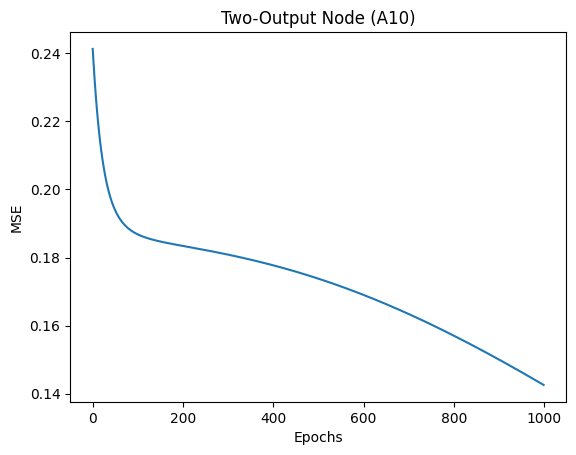

Predictions:
 [[0.838 0.162]
 [0.741 0.259]
 [0.73  0.271]
 [0.635 0.365]]
True Labels:
 [[1 0]
 [1 0]
 [1 0]
 [0 1]]


In [ ]:
if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[1,0],[1,0],[1,0],[0,1]])  # AND gate mapped to 2 outputs

    nn = SimpleNN(input_size=2, hidden_size=3, output_size=2, lr=0.05)
    errors = nn.train(X, y)

    plt.plot(errors); plt.title("Two-Output Node (A10)"); plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.show()
    preds = nn.forward(X)
    print("Predictions:\n", np.round(preds,3))
    print("True Labels:\n", y)


Question 11

In [ ]:
from sklearn.neural_network import MLPClassifier

# AND gate
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])

clf_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=2000, random_state=42)
clf_and.fit(X_and, y_and)
print("AND Gate Predictions (MLP):", clf_and.predict(X_and))

# XOR gate
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

clf_xor = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=5000, random_state=42)
clf_xor.fit(X_xor, y_xor)
print("XOR Gate Predictions (MLP):", clf_xor.predict(X_xor))


AND Gate Predictions (MLP): [0 0 0 1]
XOR Gate Predictions (MLP): [0 0 0 0]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Question 12

In [ ]:
from sklearn.preprocessing import StandardScaler

# Customer dataset
X = np.array([
    [20,6,2,386],
    [16,3,6,289],
    [27,6,2,393],
    [19,1,2,110],
    [24,4,2,280],
    [22,1,5,167],
    [15,4,2,271],
    [18,4,2,274],
    [21,1,4,148],
    [16,2,4,198]
], dtype=float)

y = np.array([1,1,1,0,1,0,1,1,0,0], dtype=int)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', max_iter=2000, random_state=42)
clf.fit(X_scaled, y)

print("Predictions:", clf.predict(X_scaled))
print("True Labels:", y)
print("Accuracy:", clf.score(X_scaled, y))


Predictions: [1 1 1 0 1 0 1 1 0 0]
True Labels: [1 1 1 0 1 0 1 1 0 0]
Accuracy: 1.0
